* **1.) What was the change in price of the stock over time?**
* **2.) What was the daily return of the stock on average?**
* **3.) What was the moving average of the various stocks?**
* **4.) What was the correlation between different stocks'?**
* **5.) How much value do we put at risk by investing in a particular stock?**
* **6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)**

# **Step 1 - Importing the libraries**

**Configuration Libraries**

In [ ]:
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

**Common Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

**Machine Learning Libraries**

In [ ]:
from sklearn.metrics import *
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
# from keras.preprocessing.sequence import TimeseriesGenerator

**Stock API**

* **Here we are using yfinance: https://pypi.org/project/yfinance/**
* **Ticker symbol docs: https://www.nasdaq.com/market-activity/stocks/screener**

In [ ]:
# !pip install yfinance
import yfinance as yf

**Grabbing data from YFINANCE**

In [ ]:
data = yf.Ticker("AAPL")

In [ ]:
hist = data.history(period = "1mo")

In [ ]:
data.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

**Converting values into dataframe**

In [ ]:
current_date = datetime.now()
start_date = datetime(current_date.year - 1, current_date.month, current_date.day)

data = yf.download("AAPL", start_date, current_date)

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True


**Data**

In [ ]:
data.head()
data.columns = [f"{col[0]}" for col in data.columns]

In [ ]:
data.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-03-03,238.029999,244.029999,236.110001,241.789993,47184000
2025-03-04,235.929993,240.070007,234.679993,237.710007,53798100
2025-03-05,235.740005,236.550003,229.229996,235.419998,47227600
2025-03-06,235.330002,237.860001,233.160004,234.440002,45170400
2025-03-07,239.070007,241.369995,234.759995,235.110001,46245700


In [ ]:
data.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-03-03,238.029999,244.029999,236.110001,241.789993,47184000
2025-03-04,235.929993,240.070007,234.679993,237.710007,53798100
2025-03-05,235.740005,236.550003,229.229996,235.419998,47227600
2025-03-06,235.330002,237.860001,233.160004,234.440002,45170400
2025-03-07,239.070007,241.369995,234.759995,235.110001,46245700


**Visualizing the data columns to get a better overview**

In [ ]:
fig = px.line(data, x=data.index, y="Close", title='Apple Closing Prices')
fig.show()

<hr>

**Data Information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-03-11 to 2025-03-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   249 non-null    float64
 1   High    249 non-null    float64
 2   Low     249 non-null    float64
 3   Open    249 non-null    float64
 4   Volume  249 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


* **Need to work with the date columns**
* **Moreover, on the weekends since the markets are closed, hence we need to check for that as well.**

**Data Description**

In [ ]:
data.describe()

,Close,High,Low,Open,Volume
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,216.167649,218.094151,213.934515,215.878978,5.575427e+07
std,25.176293,25.307696,24.757919,25.069260,3.076775e+07
min,164.224548,165.617963,163.308874,164.572928,2.323470e+07
25%,195.213898,196.280304,193.489681,194.745471,4.039830e+07
50%,224.256287,226.331875,222.515348,224.436039,4.842300e+07
75%,232.887436,234.412271,229.487690,232.588105,6.040290e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


# **Step 2 - Information on Closing Prices**

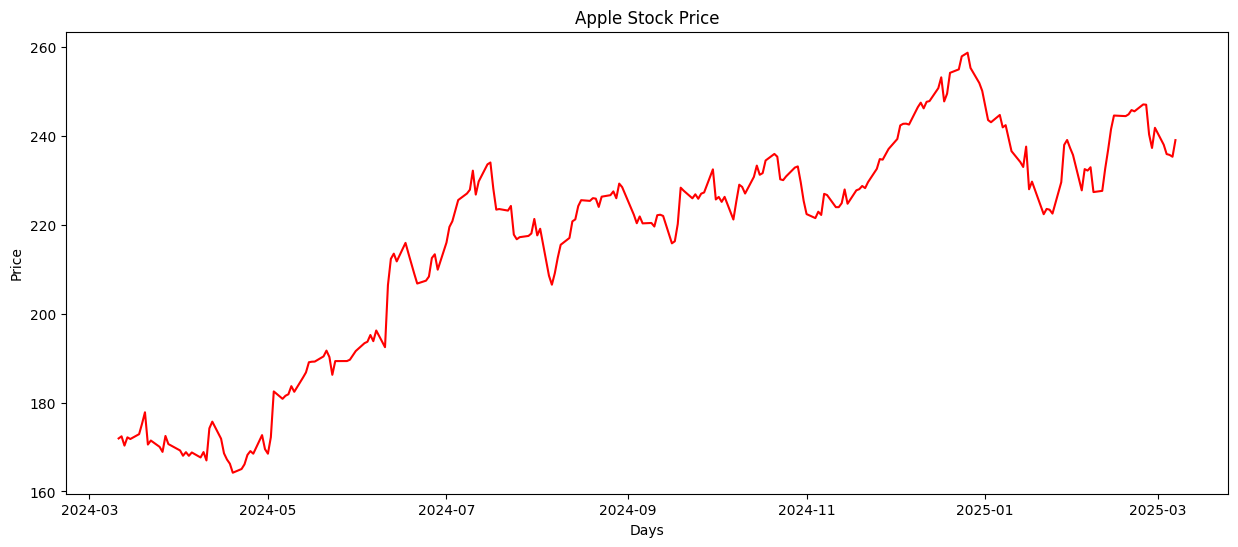

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(data.Close, color = "red")
plt.title("Apple Stock Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

# **Step 3 - Information on the volumn of the assest sold**
  * **It is the number / quantity of assests sold or traded between daily open and close**

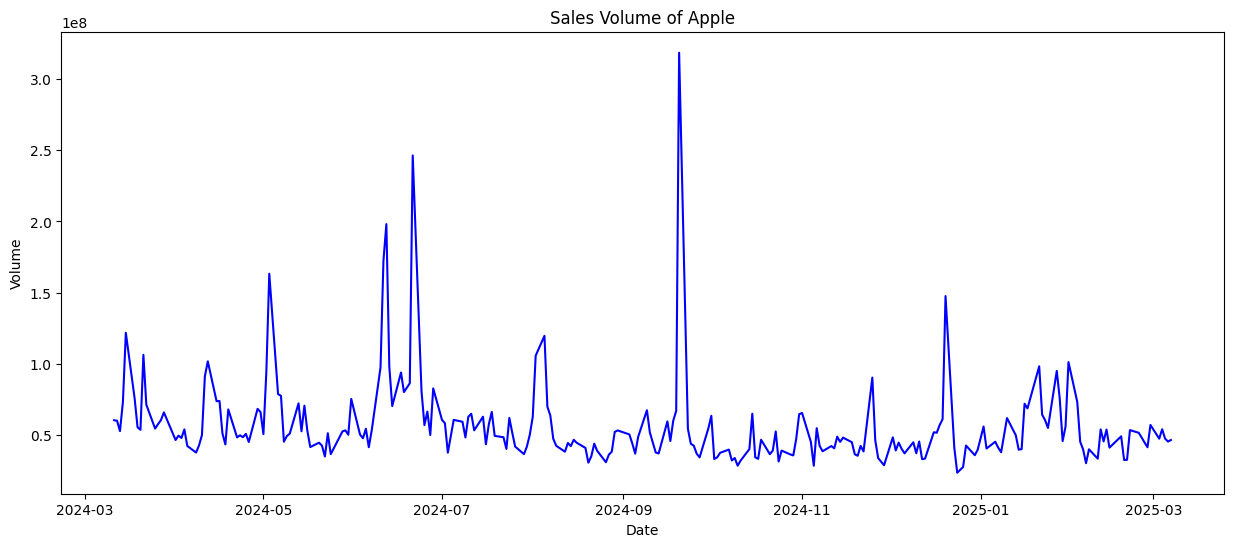

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(data.Volume, color = "blue")
plt.title("Sales Volume of Apple")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

<hr>

# **Step 4 - Working with Moving Average**
  * **This will help us find out the updates that were done according to the specified timeframe**

**Finding the MA for the data**

In [ ]:
moving_average = [10, 20, 50]

for x in moving_average:
  column_name = f"MA for {x} days"
  data[column_name] = data["Close"].rolling(window = x).mean()

**Visualizing the same**

In [ ]:
fig = px.line(data, x=data.index, y=["Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"],
              title="Moving Average for Apple Closing Prices")
fig.show()


**Based on the graph we can say**
  * **The MA taken for 50 days is not able to give us the complete information about the trends, it too smooth with respect to the data**
  * **If we look on to 10 or 20 days MA data, it seems more promising as it captures more information into it**

  * **`We can move forward with MA data having average rolled between 10 or 20 days (Recommendation : 10 days seems more promising)`**

# **Step 5 - Daily Returns of the stock on based on average**
  * **This will let us understand the risk associated with investing in each stock. So, to judge that we have to look onto the daily changes happening with the stock, here absolution won't work**

* **Need to calculate by how much the stocks are changing on daily basis**

In [ ]:
data["Daily Returns"] = data["Close"].pct_change()

* **Trying to see the percentage changes over the period of time**

In [ ]:
fig = px.line(data, x = data.index, y = "Daily Returns",
              title = "Change in stocks")
fig.show()


**So, here is clear that we are having fluctuations in the terms of change of the close price on daily basis. Trying to take a better look using histogram**

In [ ]:
fig = px.histogram(data, x = "Daily Returns",
              title = "Change in stocks")
fig.show()


<hr>

# **Step 6 - How much is the risk in investment**

In [ ]:
risk_df = pd.DataFrame(data["Adj Close"].pct_change().dropna())

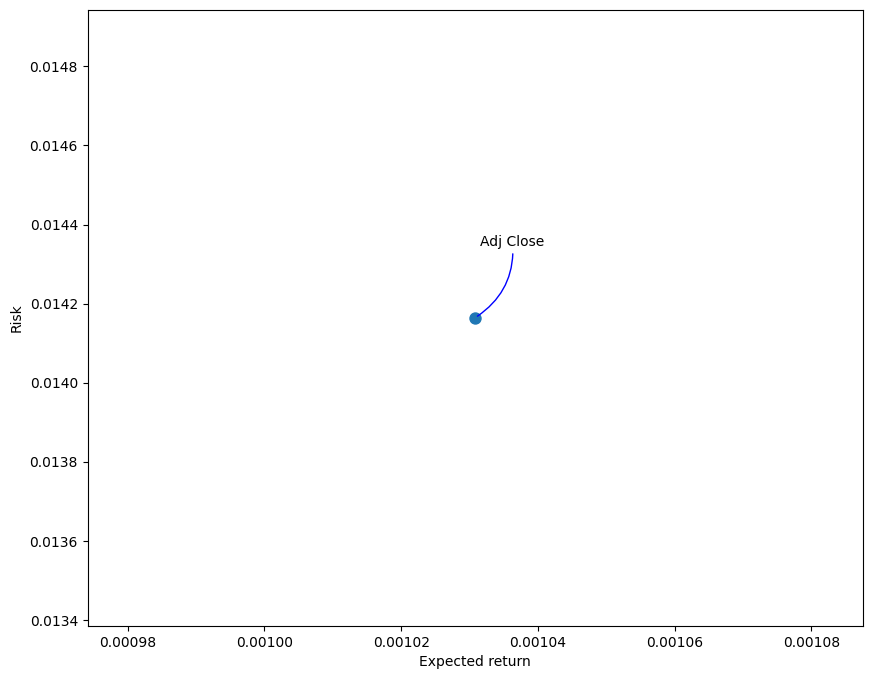

In [ ]:
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(risk_df.mean(), risk_df.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(risk_df, risk_df.mean(), risk_df.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

<hr>

# **Step 7 - Working with the training and testing data**

In [ ]:
data = yf.download("AAPL", start = "2014-01-01", end = datetime.now())

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()
data.columns = [f"{col[0]}" for col in data.columns]

In [ ]:
fig = px.line(data, x = data.index, y = "Close", title = "Close Price for Apple in Dollars ($)")
fig.show()

**Creating a seperate dataframe that only has Close columns so that we can focus on that only**

In [ ]:
df_close = data[["Close"]]

In [ ]:
len(df_close)

2812

**Grabbing the number of rows that we need to train**

In [ ]:
train_len = int(np.ceil(len(df_close) * 0.95))

In [ ]:
train_len

2672

<hr>

# **Step 8 - Working with the predictions on the data**

* **Scaling the values**
  * **It's should to be done seperately on the training and testing data, but since we are practicing right now it's fine. Otherwise look-ahead-bias issue can be there**

In [ ]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(df_close)

In [ ]:
# commonly we would have done something like this
# train_data = scaler.fit_transform(train_data)

In [ ]:
pd.DataFrame(data_scaled, columns = ["Scaled Data"])

,Scaled Data
0,0.006828
1,0.005273
2,0.005651
3,0.005153
4,0.005590
...,...
2807,0.914855
2808,0.906220
2809,0.905439
2810,0.903753


# **Step 9 - Splitting the data into training and testing**

* **We need to create the training data**

In [ ]:
train_data = data_scaled[0:train_len, :]

* **Splitting the data into training and testing part**

In [ ]:
x_train, y_train = [], []

In [ ]:
# This loop is creating sequences of 60 data points each from the training data.
# Each sequence represents the past 60 values.
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60 : i, 0])
  y_train.append(train_data[i, 0])


In [ ]:
# Converting the both in array format for usability
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# **LSTM Neural Network**

# **Step 10 - Working with Neural Net**

In [ ]:
model = Sequential()
model.add(LSTM(128,
               return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(30))
model.add(Dense(1))

**Compilation**

In [ ]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

**Fitting the data**

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 2)

Epoch 1/2
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 0.0028
Epoch 2/2
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - loss: 5.0217e-04


**Testing data creation**

In [ ]:
test_data = data_scaled[train_len - 60:, :]

* **Creating the subsets of testing**

In [ ]:
x_test = []
y_test = df_close.values[train_len:, :]

* **Creating a sequence of testing data**

In [ ]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Converting x_test to array
x_test = np.array(x_test)

In [ ]:
# Reshaping for predictions
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

**Predictions**

In [ ]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


**Evaluations**

In [ ]:
RMSE = np.sqrt(np.mean((y_test - predictions)**2))

print(f"RMSE: {RMSE}")

RMSE: 5.2597085650374185


# **Step 11 - Visualize**

In [ ]:
# We have two different data's that is training and testing
train = df_close[ : train_len]

prediction_data = df_close[train_len: ]

prediction_data["Predictions"] = predictions

In [ ]:
a = prediction_data["Close"].values

b = prediction_data["Predictions"].values

In [ ]:
fig = px.line(train, x=train.index, y= "Close", title = "Final Analysis for Apple")
fig.add_scatter(x=prediction_data.index, y= a, name = "Actual")
fig.add_scatter(x=prediction_data.index, y= b, name = "Predictions")
fig.show()

In [ ]:
prediction_data.head()

,Close,Predictions
Date,,
2024-08-15,224.226501,221.956726
2024-08-16,225.553589,223.554642
2024-08-19,225.393921,225.057220
2024-08-20,226.012573,226.075394
2024-08-21,225.902817,226.944168


In [ ]:
def evaluate(y_test = y_test, prediction = predictions):
  mse = mean_squared_error(y_test, predictions)
  print("Mean squared error:", mse)
  mae = mean_absolute_error(y_test, predictions)
  print("Mean absolute error:", mae)
  r2 = r2_score(y_test, predictions)
  print("R-squared score:", r2)
  RMSE = np.sqrt(np.mean((y_test - predictions)**2))
  print(f"RMSE: {RMSE}")

In [ ]:
evaluate()

Mean squared error: 27.664534189127984
Mean absolute error: 4.155305371965681
R-squared score: 0.7021616794013921
RMSE: 5.2597085650374185
